In [1]:
import matplotlib.pyplot as plt

#### Q1: Simulation 
Simulate Bid-ask spread dynamics for the following question: 
* The end-of-day value of a share of stock, V, is random
* At market close: either $V_H$=150 or $V_L$=100
    * With equal probability
* Before trading starts, the expected value is
    * EV=$\frac{1}{2}150 + \frac{1}{2} 100$=125
    * This is the unconditional expected value
* There are two types of traders
    * Informed traders know V
    * Uninformed (``retail'') traders don't know V
* The dealer doesn't know V
* Uninformed traders are equally likely to buy or sell
* Informed traders observe V and decide the optimal trading strategy 
* After the dealer sets the bid and ask quote, a trader arrives. 
    * Assuming: Prob(uninformed) = 0.8 and Prob(informed) = 0.2


Plot Bid-ask spread dynamics for the following two scenarios (b is buy order and s is sell order)
1) s,s,b,s,s,b,s,s,s,s,s,s
2) s,b,b,s,b,b,s,b,b,b,b,b


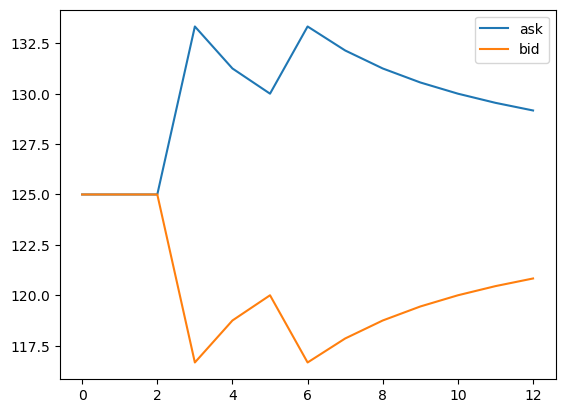

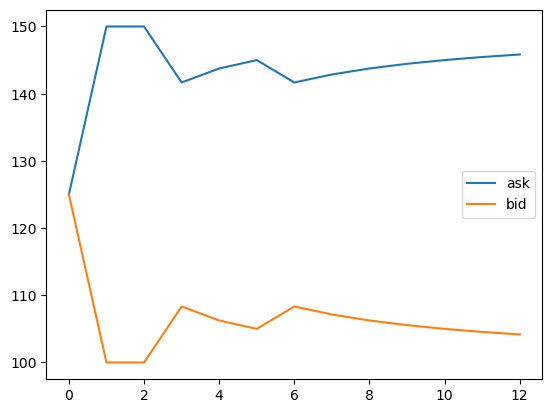

In [2]:
theta = 0.5
vH = 150
vL = 100
EV = 125
order_list1 = ['s','s','b','s','s','b','s','s','s','s','s','s']
order_list2 = ['b','b','s','b','b','s','b','b','b','b','b','b']

def spread_plot(vH, vL, order_list, EV, theta):
    ask = [0] * (len(order_list) + 1)
    bid = [0] * (len(order_list) + 1)
    ask[0] = bid[0] = EV
    runningPi = 0
    for i in range(len(order_list)):
        if order_list[i] == 'b':
            runningPi += 1
        adjustment = ((theta * (1-theta) * (runningPi/(i+1)))/((1 - runningPi/(i+1))*0.5 + (runningPi/(i+1))*(1-theta)))*(vH - vL)
        ask[i + 1] = EV + adjustment
        bid[i+1] = EV - adjustment
    return ask, bid

ask1, bid1 = spread_plot(vH, vL, order_list1, EV, theta)
ask2, bid2 = spread_plot(vH, vL, order_list2, EV, theta)

plt.plot(ask1, label='ask')
plt.plot(bid1, label='bid')
plt.legend()
plt.show()

plt.plot(ask2, label='ask')
plt.plot(bid2, label='bid')
plt.legend()
plt.show()

#### Q2: Data cleanning and data analysis 
This exercise is about ﬁxed income markets. Corporate bonds are largely traded in OTC markets. Academic Corporate Bond TRACE Dataset contains historic transaction-level data on all eligible corporate bondsinvestment grade, high yield and convertible debt. We use this dataset to understand the bond market during the COVID-19 Crisis.

* bond.csv.zip is the dataset containing TRACE data downloaded from WRDS
* VariableList.csv contains the variable description, and more detailed description is in TRACE Variable.pdf
* I will not give you instructions to clean the data. You need to underrstand what variables to use and decide your way to handle the data 

##### Data Cleaning 
* How many different companies and corporate bonds are in the data set?

* Plot the histogram of the number of trading days 

* The data reports the contra-party type. 
    * Calculate spread for each trade as follows. Note that we do not see bid/ask prices at OTC markets, so the calculation of spread is not direct. We follow the calculation in
    $$spread = 2Q * \frac{traded price - reference price}{referenc price}$$
    where Q is +1 for a customer buy and −1 for a customer sell. For each trade, we calculate its reference price as the volume-weighted average price of trades in the same bond-day
    * Plot the histogram of calculated trade spread. Do you notice that 1) lots of spreads are exactly zero, 2) there are entries with very large spreads? Please answer why those spreads are zero? Give one example to explain outlier spreads (check news and list one example that may lead to large spreads)

In [3]:
### In this project, I will use datatable (quicker) rather pandas to manipulate data. You can see which one is more intuitive for you 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 



In [4]:
data = pd.read_csv('TRACE/TRACE/bond.csv')
data.head()

C:\Users\simon\AppData\Local\Temp\ipykernel_20116\822926598.py:1: DtypeWarning: Columns (16,22,27,30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('TRACE/TRACE/bond.csv')


,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,...,rptd_last_pr,lsal_yld_sign_cd,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,rptg_party_type,contra_party_type,ATS_indicator
0,903436AA1,AAL3604479,AAL,BBG001RYS1P3,20200107,14:50:35,CORP,20200107,50555,M,...,NaN,NaN,NaN,NaN,NaN,NaN,20200109,D,C,NaN
1,903436AA1,AAL3604479,AAL,BBG001RYS1P3,20200107,14:50:35,CORP,20200107,50556,M,...,NaN,NaN,NaN,NaN,NaN,NaN,20200109,D,D,NaN
2,903436AA1,AAL3604479,AAL,BBG001RYS1P3,20200107,15:00:13,CORP,20200107,52469,M,...,NaN,NaN,NaN,NaN,NaN,NaN,20200109,D,C,NaN
3,903436AA1,AAL3604479,AAL,BBG001RYS1P3,20200107,15:00:13,CORP,20200107,52518,M,...,NaN,NaN,NaN,NaN,NaN,NaN,20200109,D,D,NaN
4,903436AA1,AAL3604479,AAL,BBG001RYS1P3,20200108,14:28:02,CORP,20200108,48599,M,...,NaN,NaN,NaN,NaN,NaN,NaN,20200110,D,D,NaN


Number of different companies: 5
Number of corporate bonds: 155


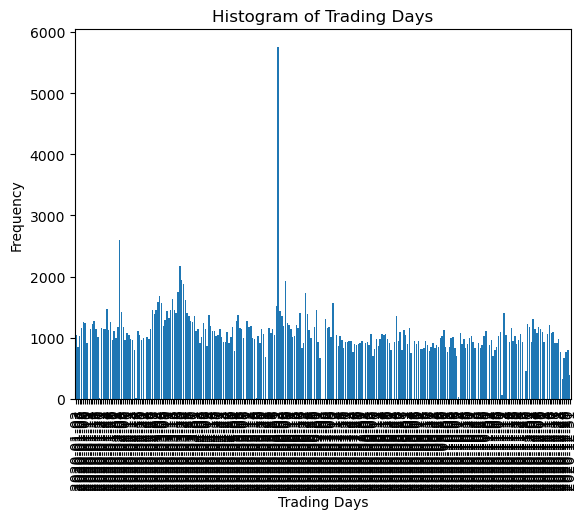

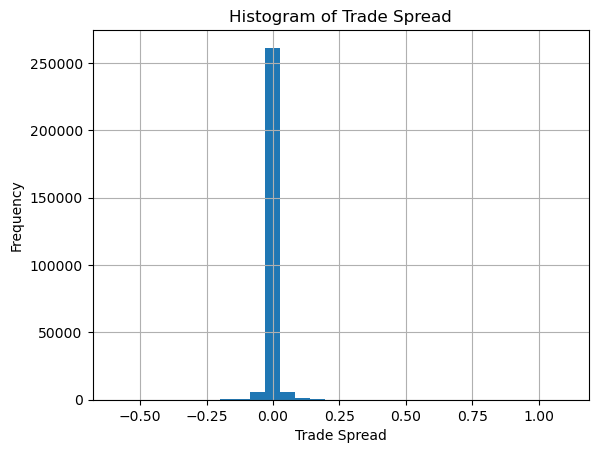

Entries with exactly zero spreads:
         cusip_id  bond_sym_id company_symbol          bsym trd_exctn_dt  \
14      903436AA1   AAL3604479            AAL  BBG001RYS1P3   2020-02-12   
15      903436AA1   AAL3604479            AAL  BBG001RYS1P3   2020-04-09   
16      903436AA1   AAL3604479            AAL  BBG001RYS1P3   2020-04-17   
17      903436AA1   AAL3604479            AAL  BBG001RYS1P3   2020-04-27   
18      903436AA1   AAL3604479            AAL  BBG001RYS1P3   2020-04-27   
...           ...          ...            ...           ...          ...   
275233  88160RAG6  TSLA4830349           TSLA  BBG00P2DPCT8   2020-10-01   
275270  88160RAG6  TSLA4830349           TSLA  BBG00P2DPCT8   2020-10-19   
275353  88160RAG6  TSLA4830349           TSLA  BBG00P2DPCT8   2020-11-11   
275437  88160RAG6  TSLA4830349           TSLA  BBG00P2DPCT8   2020-11-20   
275632  88160RAG6  TSLA4830349           TSLA  BBG00P2DPCT8   2020-12-24   

       trd_exctn_tm sub_prd_type  trans_dt  msg_seq_

In [5]:
num_companies = data['company_symbol'].nunique()
num_bonds = data['bsym'].nunique()

print(f"Number of different companies: {num_companies}")
print(f"Number of corporate bonds: {num_bonds}")

# Question 2: Plot the histogram of the number of trading days
data['trd_exctn_dt'] = pd.to_datetime(data['trd_exctn_dt'], format='%Y%m%d')  # Convert to datetime
data['TradingDays'] = data['trd_exctn_dt'].dt.date  # Extract date
data['TradingDays'].value_counts().sort_index().plot(kind='bar', width=0.8)
plt.title('Histogram of Trading Days')
plt.xlabel('Trading Days')
plt.ylabel('Frequency')
plt.show()

# Question 3: Calculate and plot the histogram of trade spread
data['Q'] = np.where(data['contra_party_type'] == 'Buy', 1, -1)
data['ReferencePrice'] = data.groupby(['bond_sym_id', 'TradingDays'])['rptd_pr'].transform('mean')

data['Spread'] = 2 * data['Q'] * (data['rptd_pr'] - data['ReferencePrice']) / data['ReferencePrice']

# Plot the histogram of calculated trade spread
data['Spread'].hist(bins=30)
plt.xlim(-0.25, 0.25)
plt.title('Histogram of Trade Spread')
plt.xlabel('Trade Spread')
plt.ylabel('Frequency')
plt.show()

# Identify spreads that are exactly zero
zero_spreads = data[data['Spread'] == 0]
print("Entries with exactly zero spreads:")
print(zero_spreads)

# Identify entries with very large spreads (outliers)
# You may use statistical methods like IQR or Z-score for outlier detection

# Example: IQR-based outlier detection
Q1 = data['Spread'].quantile(0.25)
Q3 = data['Spread'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['Spread'] < (Q1 - 1.5 * IQR)) | (data['Spread'] > (Q3 + 1.5 * IQR))]
print("Entries with very large spreads (outliers):")
print(outliers)

##### Analysis
* Daily analysis 
    * Spread
        * Aggregate spread information to the company-day level. What is the reasonable way in your opinions to do this? 
        * Using bond-day level spreads to calculate the average spread for each stock and present the results. What can we learn from the ranking of the spreads?
        * Plot time-series spread using company-day level data for each company. What patterns do you see, and why is that?
    * Volume 
        * Calculate company-day trading volume for each company
        * Plot histogram of the company-day trading volume. What is the distribution? 
    * Analsyis
        * Does past trading volume predicts future spreads? 
        * Are daily trading volume time-series correlated? 


* Intraday analysis 
    * Spread
        * For each company, construct and plot the intraday spread pattern by minutes 
    * Volume 
        * For each company, construct and plot the intraday volume pattern by minutes 
    * Analysis 
        * Does the interday pattern change during market stress periods? 
        * Is intraday volume predictable? (Note that you can also construct interday return information)


In [6]:
company_day_spreads = data.groupby(['company_symbol', 'TradingDays'])['Spread'].mean().reset_index()
company_day_spreads.head()

,company_symbol,TradingDays,Spread
0,AAL,2020-01-02,-2.464096e-21
1,AAL,2020-01-03,9.483155e-17
2,AAL,2020-01-06,0.000000e+00
3,AAL,2020-01-07,-1.456933e-17
4,AAL,2020-01-08,1.338754e-17


In [7]:
average_spreads = company_day_spreads.groupby('company_symbol')['Spread'].mean().sort_values()
print("Average Spread Ranking:")
print(average_spreads)


Average Spread Ranking:
company_symbol
AMC    -9.212903e-18
AAPL   -1.592356e-18
AAL     1.314258e-18
AMZN    1.773311e-18
TSLA    5.693645e-18
Name: Spread, dtype: float64


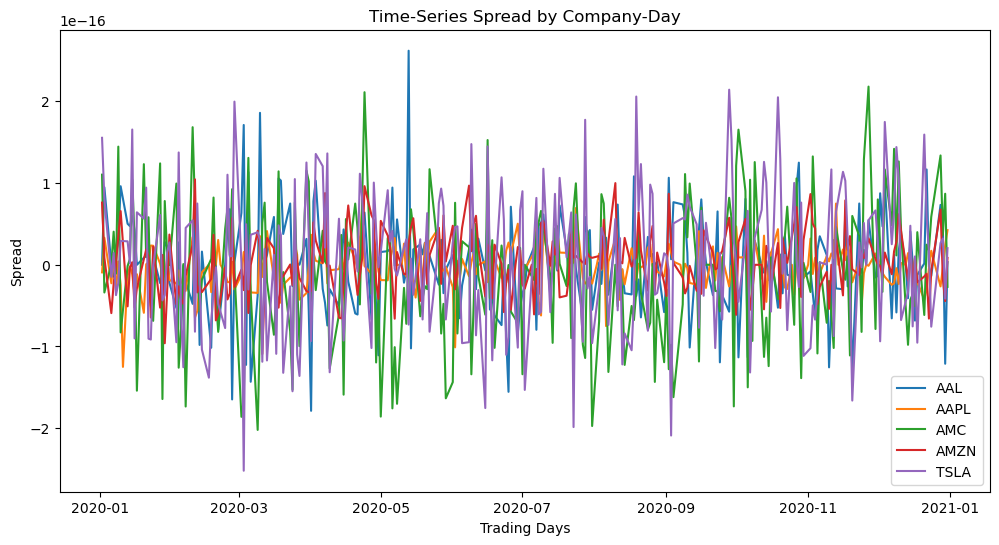

In [8]:
plt.figure(figsize=(12, 6))
for company, data in company_day_spreads.groupby('company_symbol'):
    plt.plot(data['TradingDays'], data['Spread'], label=company)
plt.title('Time-Series Spread by Company-Day')
plt.xlabel('Trading Days')
plt.ylabel('Spread')
plt.legend()
plt.show()
